<a href="https://colab.research.google.com/github/Yu-Jie06/Model/blob/main/%E6%A8%A3%E6%9C%AC%E5%A4%96%E9%A0%90%E6%B8%AC(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install joblib

import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model = load_model("/content/drive/MyDrive/models/gru_best_model_3711.h5")
scaler = joblib.load("/content/drive/MyDrive/models/scaler_3711.save")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Regularization/2025/3711_2025.csv")
df = df.dropna()

# ✅ 刪除不應該存在的欄位（與訓練階段一致）
df = df.drop(columns=['spread'])

# 取出特徵與目標（假設 target 在最後一欄）
X = df[df.columns[2:-1]]
y = df["target"].values

# 標準化與 reshape
X_scaled = scaler.transform(X)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [ ]:
y_pred_prob = model.predict(X_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

# 準確率與報告
accuracy = accuracy_score(y, y_pred)
print(f"樣本外測試準確率: {accuracy:.4f}")
print("\n分類報告:")
print(classification_report(y, y_pred))

# 混淆矩陣
print("混淆矩陣:")
print(confusion_matrix(y, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
樣本外測試準確率: 0.6854

分類報告:
              precision    recall  f1-score   support

           0       0.63      0.96      0.76        47
           1       0.89      0.38      0.53        42

    accuracy                           0.69        89
   macro avg       0.76      0.67      0.65        89
weighted avg       0.75      0.69      0.65        89

混淆矩陣:
[[45  2]
 [26 16]]


In [ ]:
import numpy as np
unique, counts = np.unique(y_pred, return_counts=True)
for label, count in zip(unique, counts):
    print(f"預測為 {label} 的筆數: {count}")

預測為 0 的筆數: 71
預測為 1 的筆數: 18


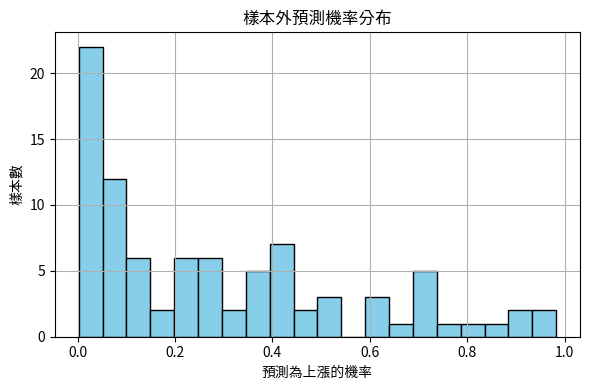

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(y_pred_prob, bins=20, color='skyblue', edgecolor='black')
plt.title("樣本外預測機率分布")
plt.xlabel("預測為上漲的機率")
plt.ylabel("樣本數")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf

# === 載入樣本外資料（2025）===
df = pd.read_csv("/content/drive/MyDrive/Regularization/2025/3711_2025.csv")
df = df.dropna()

# === 確保欄位一致（刪除訓練時就已排除的欄位）===
# 注意：有些欄位可能不存在，所以要做條件判斷
drop_columns = ['spread', 'EPS']
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

# === 取出特徵欄位（與訓練時相同）===
X = df[df.columns[2:-1]] # 假設第0欄是 date，第1欄是 stock_id，第2欄開始是特徵
print("樣本外資料的欄位順序：", X.columns.tolist())

# === 載入已訓練好的 Scaler 和 模型 ===
scaler = joblib.load("/content/drive/MyDrive/models/scaler_3711.save")   # 根據你儲存的路徑修改
model = tf.keras.models.load_model("/content/drive/MyDrive/models/gru_best_model_3711.h5")
# === 檢查欄位是否一致 ===
assert list(X.columns) == list(scaler.feature_names_in_), "欄位不一致，請檢查是否與訓練時相同"

# === 標準化 & 重塑資料格式 ===
X_scaled = scaler.transform(X)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# === 預測樣本外資料 ===
y_pred_prob = model.predict(X_reshaped)
y_pred_label = (y_pred_prob > 0.5).astype(int)

# === 輸出結果（或儲存）===
df["prediction"] = y_pred_label
print(df[["date", "prediction"]].head())
print("樣本外欄位：", list(X.columns))
print("訓練時欄位：", list(scaler.feature_names_in_))

樣本外資料的欄位順序： ['Trading_Volume', 'Trading_money', 'open', 'max', 'min', 'close', 'Trading_turnover', 'RSI', 'MA', 'FastK', 'FastD', 'Dividend Yield', 'P/E', 'P/B', 'sentiment_score']
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step
          date  prediction
6   2025-01-10           0
7   2025-01-13           0
8   2025-01-14           0
9   2025-01-15           0
10  2025-01-16           1
樣本外欄位： ['Trading_Volume', 'Trading_money', 'open', 'max', 'min', 'close', 'Trading_turnover', 'RSI', 'MA', 'FastK', 'FastD', 'Dividend Yield', 'P/E', 'P/B', 'sentiment_score']
訓練時欄位： ['Trading_Volume', 'Trading_money', 'open', 'max', 'min', 'close', 'Trading_turnover', 'RSI', 'MA', 'FastK', 'FastD', 'Dividend Yield', 'P/E', 'P/B', 'sentiment_score']


In [ ]:
y_pred_prob = model.predict(X_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

# 準確率與報告
accuracy = accuracy_score(y, y_pred)
print(f"樣本外測試準確率: {accuracy:.4f}")
print("\n分類報告:")
print(classification_report(y, y_pred))

# 混淆矩陣
print("混淆矩陣:")
print(confusion_matrix(y, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
樣本外測試準確率: 0.6854

分類報告:
              precision    recall  f1-score   support

           0       0.63      0.96      0.76        47
           1       0.89      0.38      0.53        42

    accuracy                           0.69        89
   macro avg       0.76      0.67      0.65        89
weighted avg       0.75      0.69      0.65        89

混淆矩陣:
[[45  2]
 [26 16]]


In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-07-03 12:02:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.97.102, 108.177.97.113, 108.177.97.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-07-03 12:02:44--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.125.132, 2404:6800:4008:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  76.4MB/s    in 0.3s    

2025-07-03 12:0

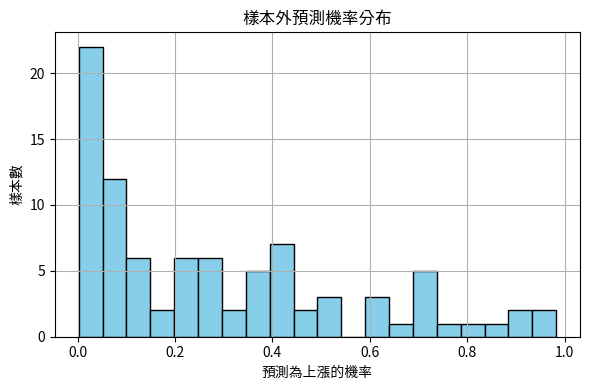

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(y_pred_prob, bins=20, color='skyblue', edgecolor='black')
plt.title("樣本外預測機率分布")
plt.xlabel("預測為上漲的機率")
plt.ylabel("樣本數")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 安裝 joblib（若尚未安裝）
!pip install joblib

import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 載入模型與標準化器
model = load_model("/content/drive/MyDrive/models/gru_best_model_2303.h5")
scaler = joblib.load("/content/drive/MyDrive/models/scaler_2303.save")

# 2. 載入樣本外資料
df = pd.read_csv("/content/drive/MyDrive/Regularization/2025/2303_2025.csv")
df = df.dropna()

# ✅ 3. 保留日期欄位（在刪除欄位之前）
dates = df['date'].values

# 4. 刪除不必要欄位
df = df.drop(columns=['spread'])

# 5. 分離特徵與目標欄位
X = df[df.columns[2:-1]]  # 假設前兩欄為日期與代碼
y = df["target"].values

# 6. 特徵標準化與 Reshape
X_scaled = scaler.transform(X)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# 7. 預測機率與類別
y_pred_prob = model.predict(X_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 8. 評估結果
accuracy = accuracy_score(y, y_pred)
print(f"樣本外測試準確率: {accuracy:.4f}")
print("\n分類報告:")
print(classification_report(y, y_pred))
print("混淆矩陣:")
print(confusion_matrix(y, y_pred))

# ✅ 9. 建立預測結果表格
result_df = pd.DataFrame({
    'date': dates,
    'true_label': y,
    'pred_label': y_pred,
    'pred_prob_up': y_pred_prob.flatten()
})

# ✅ 10. 篩選預測錯誤的樣本
misclassified_df = result_df[result_df['true_label'] != result_df['pred_label']]
print("\n預測錯誤的樣本：")
print(misclassified_df)

# ✅ 11. 如果想輸出 CSV（可選）
# misclassified_df.to_csv("/content/drive/MyDrive/output/misclassified_3711.csv", index=False)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step
樣本外測試準確率: 0.7865

分類報告:
              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.84      0.76      0.80        49

    accuracy                           0.79        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.79      0.79      0.79        89

混淆矩陣:
[[33  7]
 [12 37]]

預測錯誤的樣本：
          date  true_label  pred_label  pred_prob_up
4   2025-01-16           1           0      0.194436
9   2025-02-03           1           0      0.025257
13  2025-02-07           1           0      0.203448
14  2025-02-10           1           0      0.269112
18  2025-02-14           0           1      0.806916
20  2025-02-18           0           1      0.778762
24  2025-02-24           0           1      0.668666
26  2025-02-26           1           0      0.418423
27  2025-02-27           1           0      0.326540
31  2025-03-06           0           1      0